In [2]:
# Load libraries
from pandas import read_csv
import pandas as pd
import ipaddress
import keras
import numpy as np
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
...

Ellipsis

In [3]:
...
# Load dataset
import csv
path = r"C:\Users\15853\Downloads\MachineLearningCSV\MachineLearningCVE\Friday-WorkingHours-Morning.pcap_ISCX.csv"
datapath= open(path, 'r')
data = read_csv(datapath, delimiter=",")
##data.pop('type')
##data.pop('date')
##data.pop('IP')
label=data.pop(' Label')
print(data.shape)
print(data[:3])

(191033, 78)
    Destination Port   Flow Duration   Total Fwd Packets  \
0               3268       112740690                  32   
1                389       112740560                  32   
2                  0       113757377                 545   

    Total Backward Packets  Total Length of Fwd Packets  \
0                       16                         6448   
1                       16                         6448   
2                        0                            0   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                          1152                     403   
1                          5056                     403   
2                             0                       0   

    Fwd Packet Length Min   Fwd Packet Length Mean   Fwd Packet Length Std  \
0                       0                    201.5              204.724205   
1                       0                    201.5              204.724205   
2                       0             

In [4]:
label[:3]

0    BENIGN
1    BENIGN
2    BENIGN
Name:  Label, dtype: object

In [10]:
new_data = data.replace([np.inf, -np.inf], np.nan)



for column in data:
    data[np.any(np.isnan(data[column]))]=0 
    data[np.all(np.isfinite(data[column]))]

In [11]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
data.info()

data.Flow_Packets/s.fillna(0)

In [12]:
le=preprocessing.LabelEncoder()

lis=[]
for row in data.itertuples(index=True, name='IPV4_DST_ADDR'):
    ip=ip2int(((getattr(row, "IPV4_DST_ADDR"))))
    lis.append(ip)
len(lis)
ips=pd.Series(lis)
data['IPV4_DST_ADDR']=ips

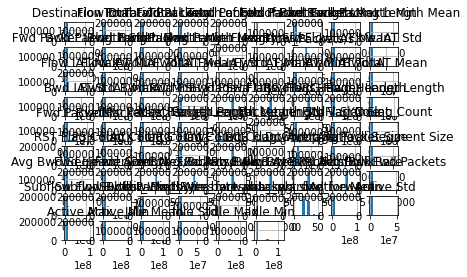

In [13]:
new_data.hist()
pyplot.show()

In [14]:
data.replace([np.inf, -np.inf], np.nan)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,3268,112740690,32,16,6448,1152,403,0,201.5,204.724205,...,15,32,3.594286e+02,1.199802e+01,380,343,16100000.0,4.988048e+05,16400000,15400000
1,389,112740560,32,16,6448,5056,403,0,201.5,204.724205,...,15,32,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000
2,0,113757377,545,0,0,0,0,0,0.0,0.000000,...,0,0,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997
3,5355,100126,22,0,616,0,28,28,28.0,0.000000,...,21,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
4,0,54760,4,0,0,0,0,0,0.0,0.000000,...,0,0,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191028,53,61452,4,2,180,354,45,45,45.0,0.000000,...,3,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
191029,53,171,2,2,80,272,40,40,40.0,0.000000,...,1,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
191030,53,222,2,2,90,354,45,45,45.0,0.000000,...,1,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
191031,123,16842,1,1,48,48,48,48,48.0,0.000000,...,0,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0


In [15]:
np.where(np.isnan(data))

(array([   604,    604,   3786,   3786,   4153,   4153,   4466,   4466,
          4752,   4752,   9581,   9581,  10832,  11779,  11779,  12504,
         12504,  13094,  13094,  13951,  13951,  14040,  14040,  14184,
         14184,  16847,  16847,  17875,  17875,  20901,  23787,  23787,
         23789,  24347,  24347,  25236,  25236,  26374,  28318,  28318,
         29371,  29371,  30607,  30607,  31119,  31119,  33627,  33627,
         33722,  33722,  33777,  33777,  34227,  34227,  34541,  34807,
         34807,  36102,  36706,  36706,  36883,  37288,  37288,  37613,
         37613,  38012,  38012,  39136,  39136,  39729,  40413,  40413,
         40764,  40764,  41273,  41273,  41712,  41712,  42738,  42738,
         45523,  45523,  47530,  47530,  48247,  48247,  49812,  51755,
         51755,  57793,  57882,  57882,  61076,  61076,  61720,  61720,
         63707,  63864,  63864,  64068,  64068,  68927,  68927,  70359,
         70359,  70816,  75928,  75928,  75995,  75995,  76440, 

In [ ]:
np.nan_to_num(data)

In [16]:
le.fit(label)
Y=le.transform(label)
Y[:3]

array([0, 0, 0])

In [17]:
nan_values = data.isna()

nan_columns = nan_values.any()


columns_with_nan = data.columns[nan_columns].tolist()

print(columns_with_nan)

['Flow Bytes/s', ' Flow_Packets/s']


In [18]:
data['Flow Bytes/s'] = data['Flow Bytes/s'].replace(np.nan, 0)
data[' Flow_Packets/s'] = data[' Flow_Packets/s'].replace(np.nan, 0)

In [19]:
preprocessed_inputs_cat = layers.Concatenate()(preprocessed_inputs)

titanic_preprocessing = tf.keras.Model(inputs, preprocessed_inputs_cat)

tf.keras.utils.plot_model(model = titanic_preprocessing , rankdir="LR", dpi=72, show_shapes=True)

NameError: name 'layers' is not defined

In [20]:
# Split-out validation dataset

X = data
le.fit(label)
Y=le.transform(label)
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, random_state=1)


In [ ]:
...
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))#Navie
models.append(('SVM', SVC(gamma='auto')))##SVM
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f )' % (name, cv_results.mean(), cv_results.std()))

D:\ML\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\ML\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\ML\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\ML\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\ML\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\ML\lib\site-packages\sklearn\svm

LR: 0.989400 (0.000411 )
LDA: 0.984492 (0.001317 )
KNN: 0.995995 (0.000289 )
CART: 0.999679 (0.000188 )
NB: 0.379242 (0.007861 )
